# Laboratory 6 - Rootfinding algorithms
#### Grzegorz Fotyga

## 1 Introduction

The goal of the lab is to implement two root-finding algorithms, the bisection method and the secant method, and use them to solve the following two problems:

### Problem 1 
Figure 1 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to express the impedance magnitude of the system as follows:

$|Z| = \dfrac{1}{\sqrt{\dfrac{1}{R^2} + (\omega C - \dfrac{1}{\omega L})^2}}  \   \   \   \  (1)$       


where $\omega$ is the angular frequency. Find the $\omega$ that results in an impedance of $75 \Omega$. For the following parameters: R = $725\Omega$, C = 8e−5F, L = 2H, with initial interval $\omega \in \left< 1,50 \right>$  and $\epsilon_f$ = 1e−12.


### Problem 2

The upward velocity of a rocket can be computed by the following formula 

$v = u \text{ln}\left(\dfrac{m_0}{m_0 - qt} \right) - gt     \  \    \  \    (2)$    


where $t$ denotes the time, $v$ is the upward velocity, $m_0$ - the initial mass of the rocket at time $t = 0$, $u$ - the velocity at which fuel is expelled relative to the rocket, $q$ - the fuel consumption rate, $g = 9.81m/s2$ - the downward acceleration of gravity. Compute the time, at which $v = 750m/s$, assuming $m_0 = 150000kg$, $q = 2700kg/s$, $u = 2000m/s$. Set the initial interval to: $t \in \left< 1, 50 \right>$, and the tolerance to: $\epsilon_f$ = 1e−12.



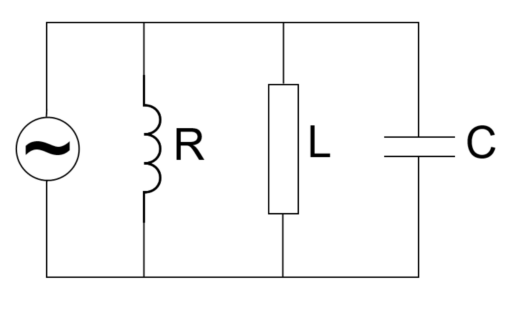

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('circuit.png')
imgplot = plt.imshow(img)
plt.axis('off')  
plt.show()

### Task 1

- Define a function whose input parameter is $\omega$ and output parameter is impedance $Z$, based on formula (1).
- Define a function whose input parameter is a time $t$ and output parameter is velocity $v$, based on formula (2).


In [68]:
import math
import numpy as np

# your code
def impedance(omega):
    R = 725
    L = 2
    C = 8e-5
    Z = 1/math.sqrt(1/R**2 + (omega*C - 1/(omega*L))**2)
    abs(Z)
    return Z

def velocity(t):
    m0 = 150000
    q = 2700
    u = 2000
    g = 9.81
    v = u * np.log(m0/(m0 - q*t)) - g * t
    return v


### Task 2

Implement bisection algorithm in a form of a function with the following input parameters: 
- initial interval - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify two stopping criterions:
- absoulte value of a function in the middle of subregion will drop below $\epsilon_f$
or:
- width of subregion drops below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your bisection algorithm on a simple function (suggest one!)

In [111]:
# your code
def bisection(f, a, b):
    epsilon_f=1e-12
    iterations = 0
    bisection_vector = []
    while True:
        c = (a + b) / 2.0
        iterations += 1
        bisection_vector.append(abs(f(c)))
        if abs(f(c)) < epsilon_f or abs(b - a) < epsilon_f:
            return c, iterations, bisection_vector
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

def test_function(x):
    return x**2 - 169  # Root at x = 13

root, iterations, vec = bisection(test_function, 1, 50)
print(f"Root found at x = {root}")
print(f"Number of iterations: {iterations}")



Root found at x = 12.999999999999709
Number of iterations: 47


### Task 3

Implement secant algorithm in a form of a function with the following input parameters: 
- the first two points - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify a stopping criterion:
- absoulte value of a function in the current point will drop below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your secant algorithm on a simple function (suggest one!)

In [110]:
# your code
def secant(f, a, b):
    epsilon_f=1e-12
    fa = f(a)
    fb = f(b)
    iterations = 0
    secant_vector = []

    while True:
        c = b - fb * (b - a) / (fb - fa)
        a, fa = b, fb
        b, fb = c, f(c)
        iterations += 1
        secant_vector.append(abs(fb))
        if abs(fb) < epsilon_f:
            return b, iterations, secant_vector



def test_function(x):
    return x**2 - 169  # Root at x = 13

# Test the bisection method
root, iterations, vec = secant(test_function, 1, 50)
print(f"Root found at x = {root}")
print(f"Number of iterations: {iterations}")

Root found at x = 13.000000000000027
Number of iterations: 9


### Task 4

Test your algorithms on the real problems specified in the previous points. How many iterations did each method take to converge? What is the value of $\omega$ and $t$ you are looking for?

In [120]:
# your code

def find_impedance(omega):
    return impedance(omega) - 75


def find_velocity(t):
    return velocity(t) - 750


print("Using bisection: ")
impedance1, iterations_i1, bvector_impedance = bisection(find_impedance, 1, 50)
print(f"Impedance found at omega = {impedance1}")
print(f"Number of iterations: {iterations_i1}")

velocity1, iterations_v1, bvector_velocity = bisection(find_velocity, 1, 50)
print(f"Velocity found at t = {velocity1}")
print(f"Number of iterations: {iterations_v1}")

print("Using secant: ")
impedance2, iterations_i2, svector_impedance = secant(find_impedance, 1, 50)
print(f"Impedance found at omega = {impedance2}")
print(f"Number of iterations: {iterations_i2}")

velocity2, iterations_v2, svector_velocity = secant(find_velocity, 1, 50)
print(f"Velocity found at t = {velocity2}")
print(f"Number of iterations: {iterations_v2}")



Using bisection: 
Impedance found at omega = 31.656891705126483
Number of iterations: 46
Velocity found at t = 21.13241513592606
Number of iterations: 47
Using secant: 
Impedance found at omega = 31.656891705126682
Number of iterations: 7
Velocity found at t = 21.132415135926294
Number of iterations: 8


### Task 5

As the output data in the Bisection and Secant algorithms, add a vector storing subsequent absolute values of the function (in subsequent root approximations). Plot this vector. What can you say about the convergence?

Hint: In subsequent iterations, you compute approximate values of the root as well as the absolute values of the analyzed function at these points. The goal here is to plot (using the plt.semilogy() function) the absolute values of the function. For the last iteration, it should be below 1e-12.

Focus on the convergence rates. Is it linear? Quadratic? Compare it with the results shown in the lecture slides.

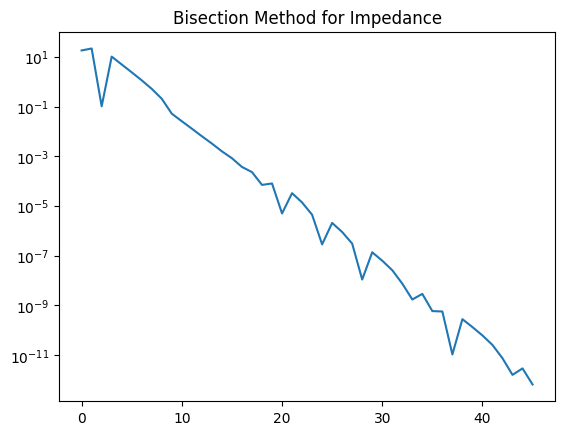

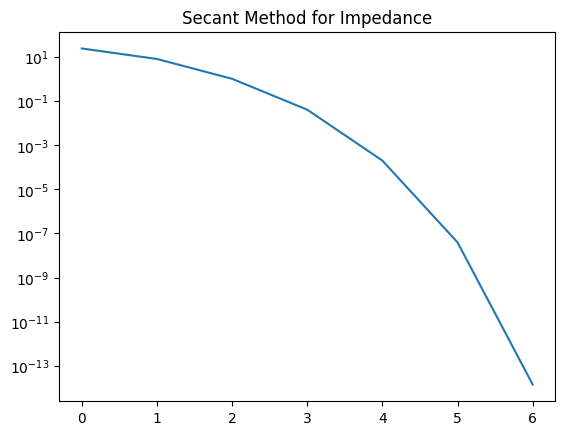

In [118]:
#your code

plt.plot(bvector_impedance, label='Bisection Impedance')
plt.title('Bisection Method for Impedance')
plt.semilogy()
plt.show()

plt.plot(svector_impedance, label='Secant Impedance')
plt.title('Secant Method for Impedance')
plt.semilogy()
plt.show()


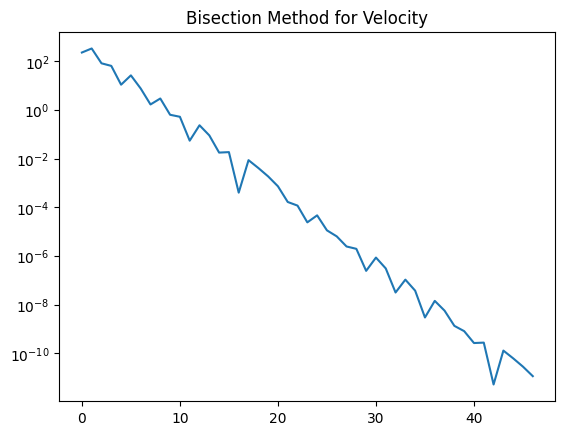

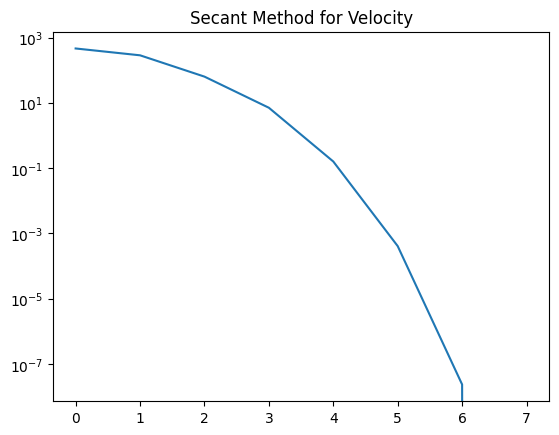

In [119]:
plt.plot(bvector_velocity, label='Bisection Velocity')
plt.title('Bisection Method for Velocity')
plt.semilogy()
plt.show()

plt.plot(svector_velocity, label='Secant Velocity')
plt.title('Secant Method for Velocity')
plt.semilogy()
plt.show()